Use yellowbricks to get a comparison of the features weight in the learning process of where landsliding is going to occur

In [2]:
%%capture
!pip install -U yellowbrick

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
# From Google Drive
df = pd.read_csv("/content/drive/MyDrive/Workfolder/Work_tech/sajag_nepal/Sindhupalchok_pilot_study/GIS_data/susceptibility/ML_parameters_weighting/data/output/clean_df.csv")

In [15]:
# df = pd.read_csv("data/output/clean_df.csv")

In [6]:
df = df[['RidgeStrea', 'UpSlpArea', 'Elevation', 'PlanCurv', 'ProfilCurv', 'Slope', 'Aspect', 'ClayConten', 'SandConten', 'xcoord', 'ycoord', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11']]

In [7]:
df.describe()

,RidgeStrea,UpSlpArea,Elevation,PlanCurv,ProfilCurv,Slope,Aspect,ClayConten,SandConten,xcoord,ycoord,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11
count,939530.000000,9.395300e+05,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,9.395300e+05,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000,939530.000000
mean,0.485010,5.428259e+02,144.554141,0.000297,0.000011,32.942451,180.873237,9.566040,47.867825,376007.096581,3.087870e+06,0.002634,0.002438,0.003170,0.015285,0.021737,0.018295,0.012701,0.014754,0.011792,0.014647,0.012555
std,0.297505,2.274411e+04,73.678933,0.105080,0.032896,14.099838,100.413640,3.128316,5.161405,14072.171313,1.461301e+04,0.051258,0.049320,0.056211,0.122685,0.145825,0.134017,0.111981,0.120567,0.107949,0.120134,0.111344
min,0.000000,0.000000e+00,0.000000,-2.725000,-0.855000,0.000000,0.000000,3.686000,38.304000,346954.441000,3.054960e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217000,1.000000e+00,90.000000,-0.049000,-0.019000,22.738000,94.686000,7.301000,44.753000,364504.441000,3.076360e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.480000,2.000000e+00,155.000000,0.000000,0.000000,32.142000,187.431000,8.688000,46.614000,376404.441000,3.087160e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.749000,8.000000e+00,209.000000,0.049000,0.020000,42.249000,263.660000,11.064000,49.205000,387304.441000,3.099810e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.634944e+06,254.000000,3.211000,0.863000,87.339000,359.630000,26.704000,71.884000,407754.441000,3.117260e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create train and test dataset
target = "E1"
y = df[target]
X = df.drop([target], axis=1)
features = list(X.columns)

# Normalized datatset
X = MinMaxScaler().fit_transform(X)

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
n_features = X.shape[1]

In [9]:
print("X_train :{}, y_train:{}, X_test:{}, y_test:{} \n for the features : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape, features))

X_train :(704647, 21), y_train:(704647,), X_test:(234883, 21), y_test:(234883,) 
 for the features : ['RidgeStrea', 'UpSlpArea', 'Elevation', 'PlanCurv', 'ProfilCurv', 'Slope', 'Aspect', 'ClayConten', 'SandConten', 'xcoord', 'ycoord', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11']


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


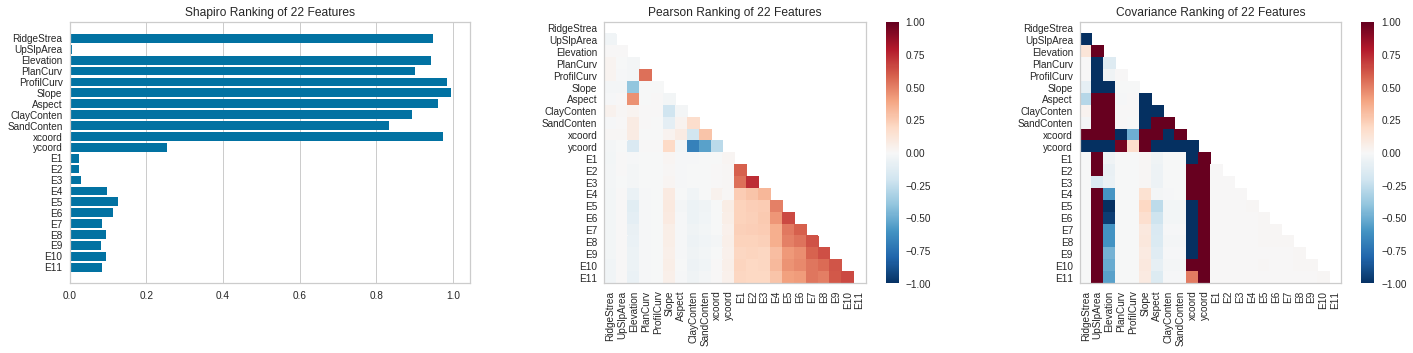

In [10]:
from yellowbrick.features import rank1d, rank2d
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(20,5))

rank1d(df, ax=axes[0], show=False)
rank2d(df, algorithm='pearson', ax=axes[1], show=False)
rank2d(df, algorithm='covariance', ax=axes[2], show=False)

plt.tight_layout()
plt.show()

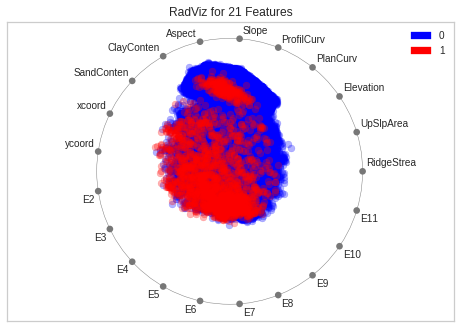

RadialVisualizer(alpha=0.3,
                 ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f758c18d5d0>,
                 classes=[0, 1], colormap='bwr', colors=None,
                 features=['RidgeStrea', 'UpSlpArea', 'Elevation', 'PlanCurv',
                           'ProfilCurv', 'Slope', 'Aspect', 'ClayConten',
                           'SandConten', 'xcoord', 'ycoord', 'E2', 'E3', 'E4',
                           'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11'])

In [16]:
from yellowbrick.features import *

# Specify the target classes
classes = [0, 1]

# Instantiate the visualizer
radviz(X, y, classes=classes, features=features, colormap="bwr", alpha=0.3)

In [ ]:
targets = ["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10", "E11"]

for t in targets:
  tar = df[t]
  fea = df.drop([t], axis=1)
  names = list(fea.columns)

  # Specify the target classes
  classes = [0, 1]

  # Instantiate the visualizer
  print("the target is : {}".format(t))
  radviz(fea, tar, classes=classes, features=names, colormap="bwr", alpha=0.3)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


models = [ 
    LinearSVC(),
    # SGDClassifier(max_iter=100, tol=1e-3), 
    # KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=2000), 
    # LogisticRegressionCV(cv=3, max_iter=2000),
    # BaggingClassifier(), 
    # ExtraTreesClassifier(n_estimators=300),
    # GaussianNB(),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y) # useful???????

    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)


LinearSVC: 0.8352589798003616
SGDClassifier: 0.6629103572406776
LogisticRegression: 0.7626938775510205


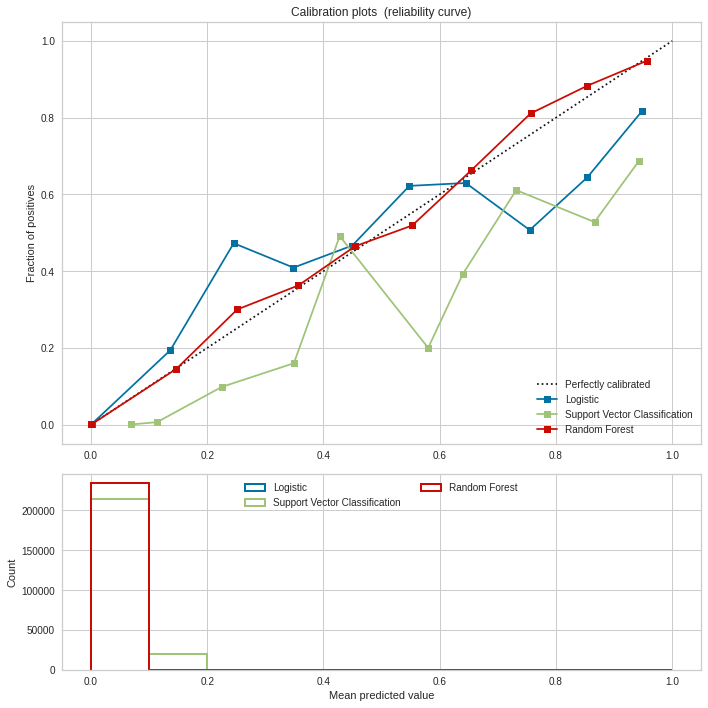

In [17]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve


# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier()


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  # (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
# test which features are the most important in the learning process
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

r = permutation_importance(model, X_test, y_test,
                           n_repeats=3,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

In [ ]:
# Instaniate the classification model and visualizer
import matplotlib.pyplot as plt
from yellowbrick.classifier import PrecisionRecallCurve

# !! model is inherited from previous cell

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
X_test = X_test.transpose()
viz.score(X_test, y_test)
viz.show()

## Optimizers

In [ ]:
# optimise ML
!pip install scikit-optimize

In [ ]:
# report scikit-optimize version number
import skopt
print('skopt %s' % skopt.__version__)

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

# pipeline class is used as estimator to enable
# search over different model types
pipe = Pipeline([
    ('model', LinearSVC())
])

# single categorical value of 'model' parameter is
# sets the model class
# We will get ConvergenceWarnings because the problem is not well-conditioned.
# But that's fine, this is just an example.
linsvc_search = {
    'model': [LinearSVC(max_iter=1000)],
    'model__C': (1e-6, 1e+6, 'log-uniform'),
}

# explicit dimension classes can be specified like this
svc_search = {
    'model': Categorical([SVC()]),
    'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'model__degree': Integer(1,8),
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
}

opt = BayesSearchCV(
    pipe,
    # (parameter space, # of evaluations)
    [(svc_search, 40), (linsvc_search, 16)],
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))